
## PROJET FINAL - Prédiction churns opérateurs téléphoniques
Dataset Churns https://www.kaggle.com/datasets/kapturovalexander/customers-churned-in-telecom-services?resource=download
"""

In [2]:
#Dataset transac metaverse: https://www.kaggle.com/datasets/faizaniftikharjanjua/metaverse-financial-transactions-dataset
#pip install pandas numpy matplotlib seaborn sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [14]:
df = pd.read_csv('customer_churn_telecom_services.csv')  # chargement données

## PIPELINE ##
#### Extract (exploration et analyse)

In [16]:
print("Colonnes disponibles :", df.columns.tolist())

print(df.head()) #aperçu de la df 
print(df.describe()) #donne les stat, moyennes, quartiles, min, max. 
print(df.isnull().sum()) # Vérification des valeurs manquantes
print(df.duplicated().sum()) # Vérification des doublons
for col in df.select_dtypes(include='object').columns: #quels valeurs possibles par catégorie
    print(f"\n{col}: {df[col].unique()}")


Colonnes disponibles : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes       

/var/folders/9r/mg4gblmx0ml2wjrblqpzzchw0000gn/T/ipykernel_43914/3818587980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


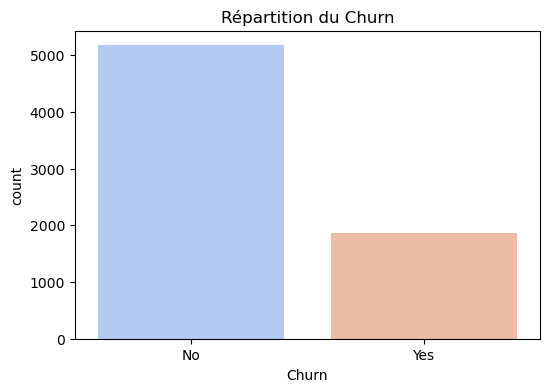

In [18]:
# Distribution graph churns
plt.figure(figsize=(6,4)) 
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Répartition du Churn')
plt.show()

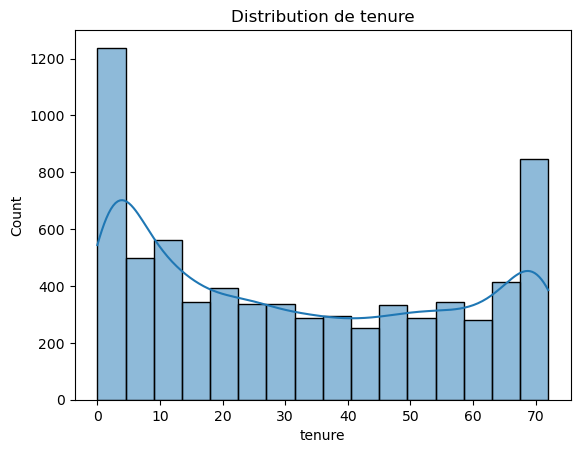

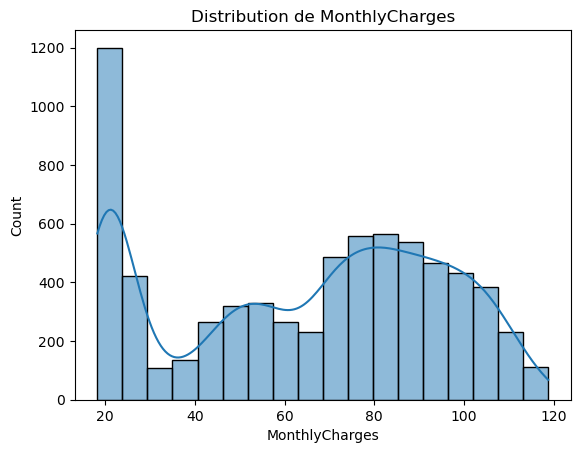

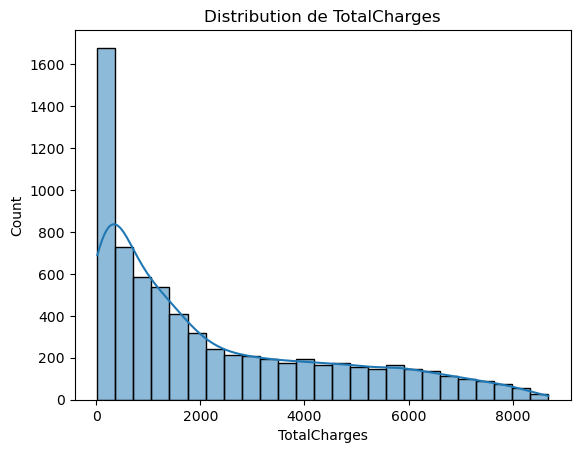

In [20]:
# distribution des frais / durée abonnement
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 
for feature in numerical_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution de {feature}')
    plt.show()

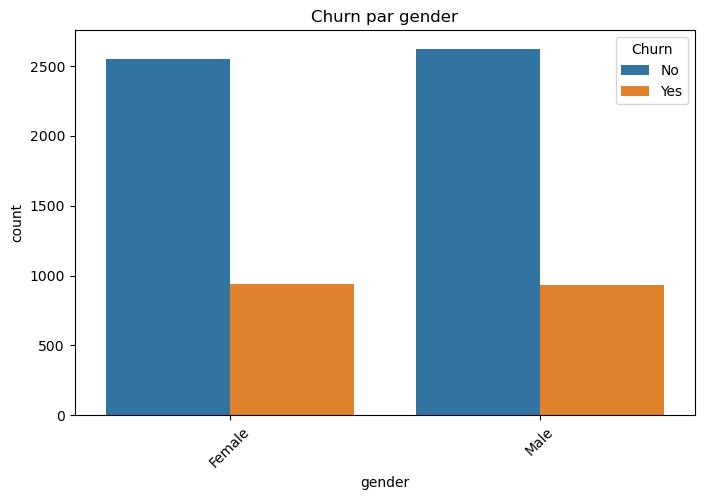

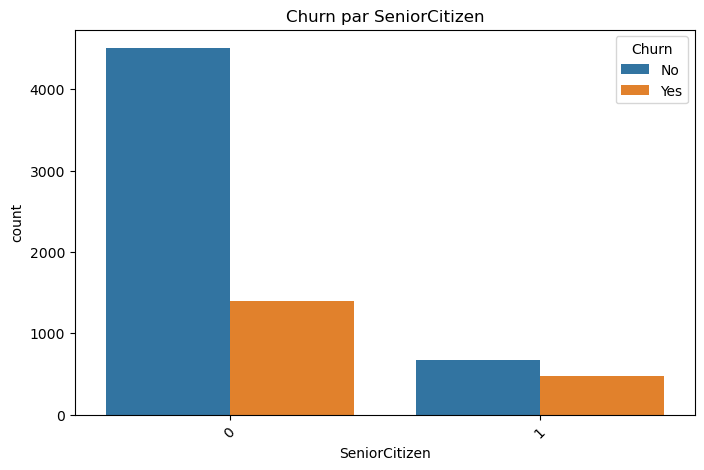

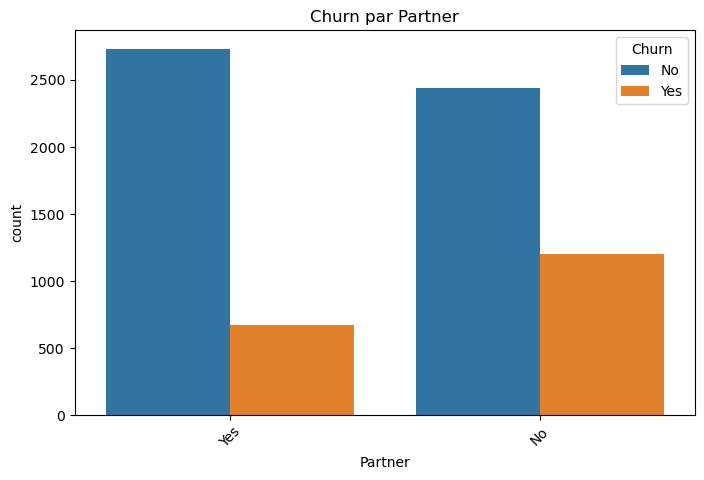

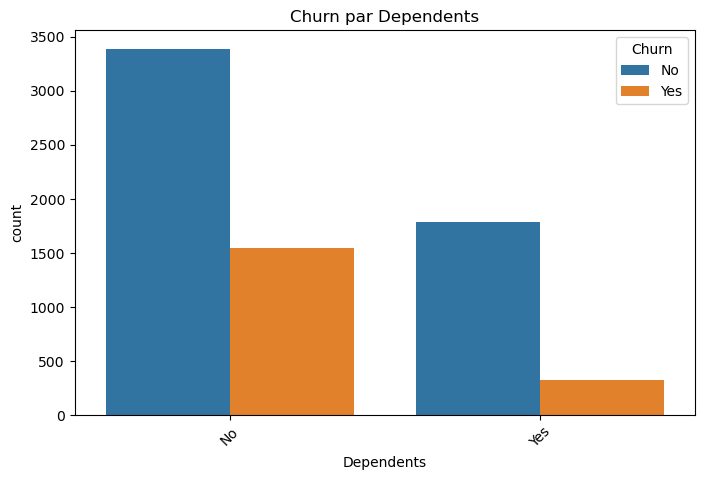

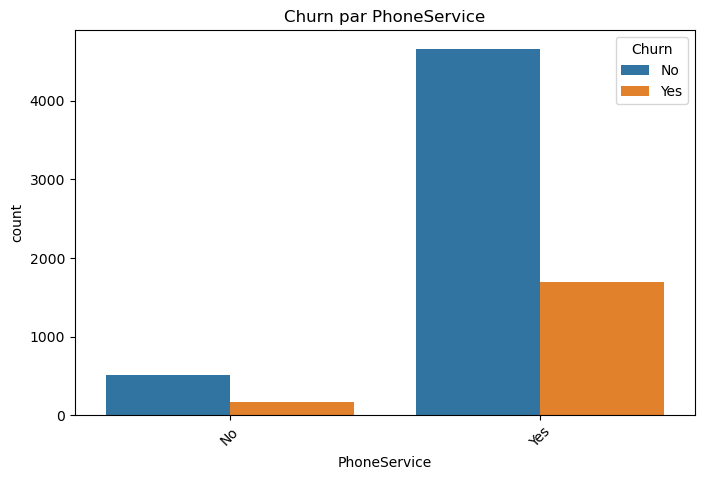

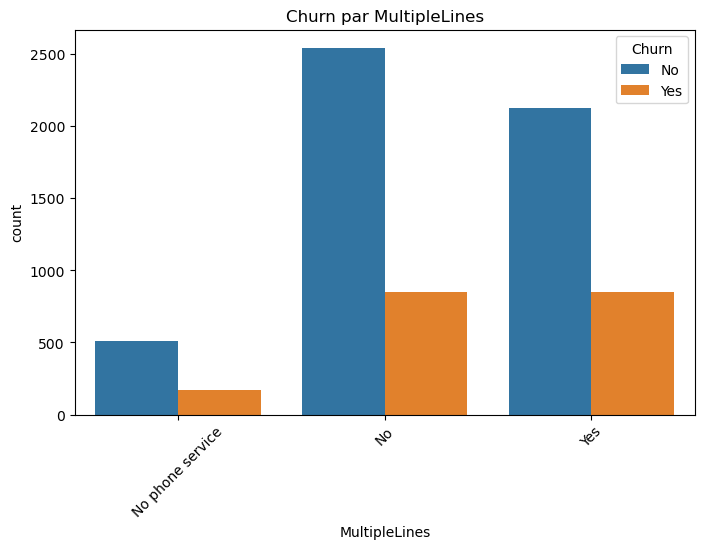

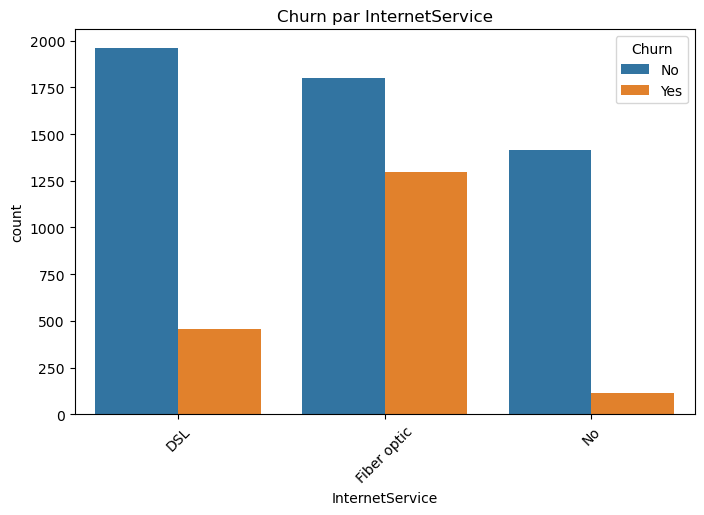

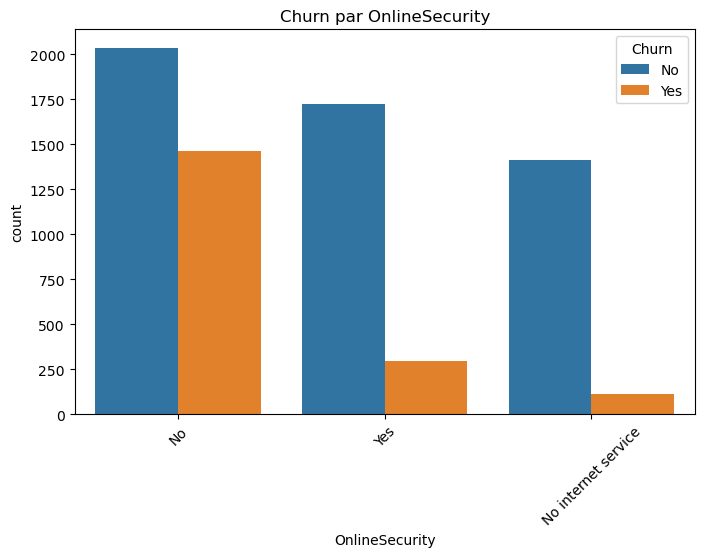

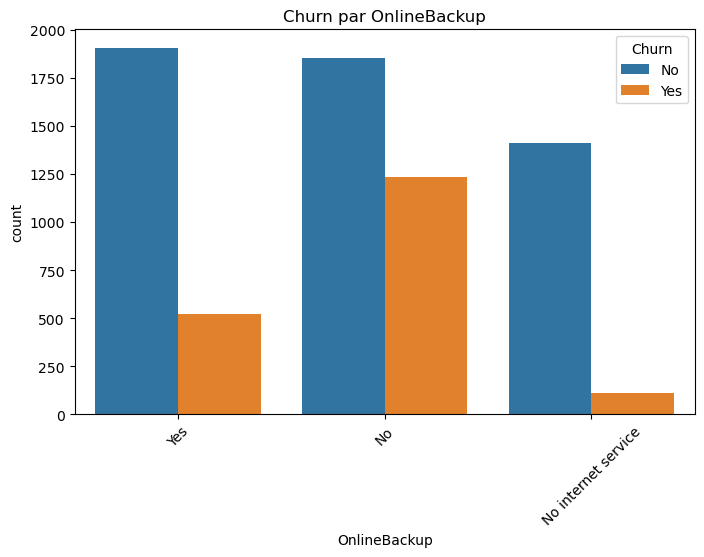

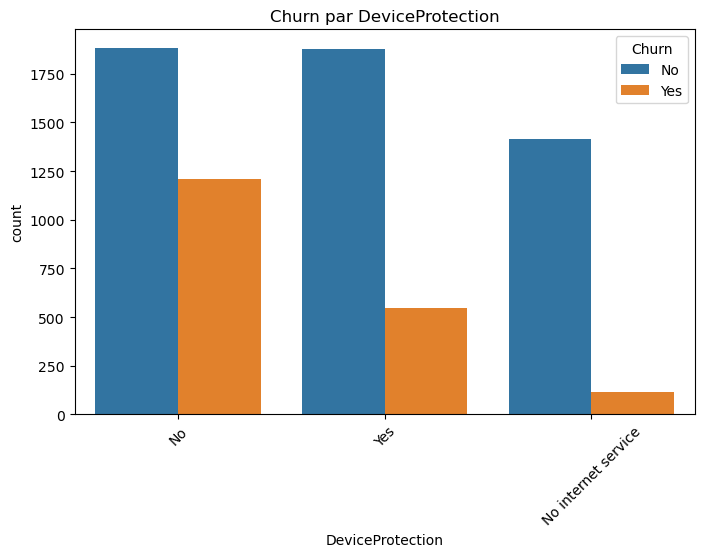

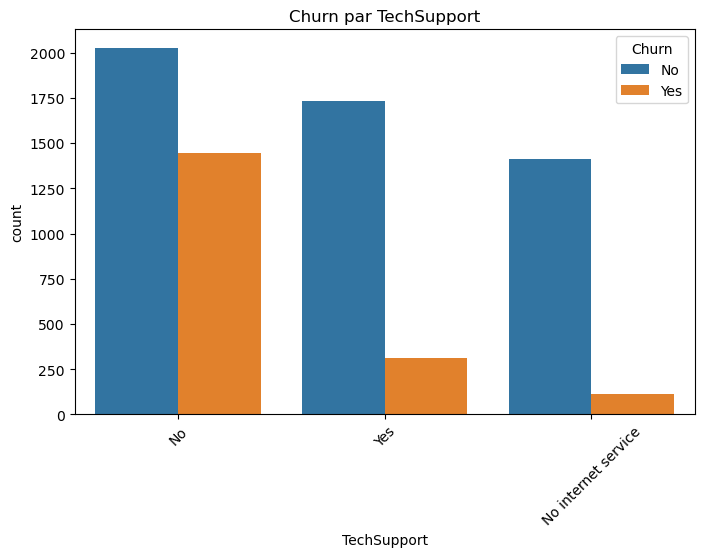

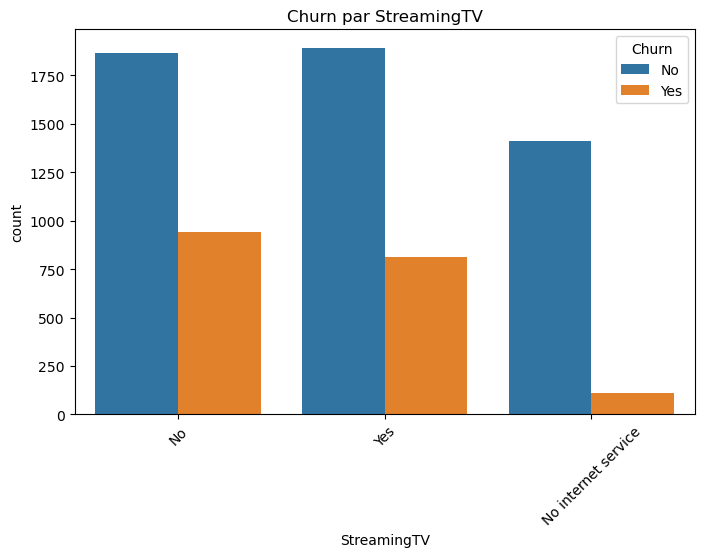

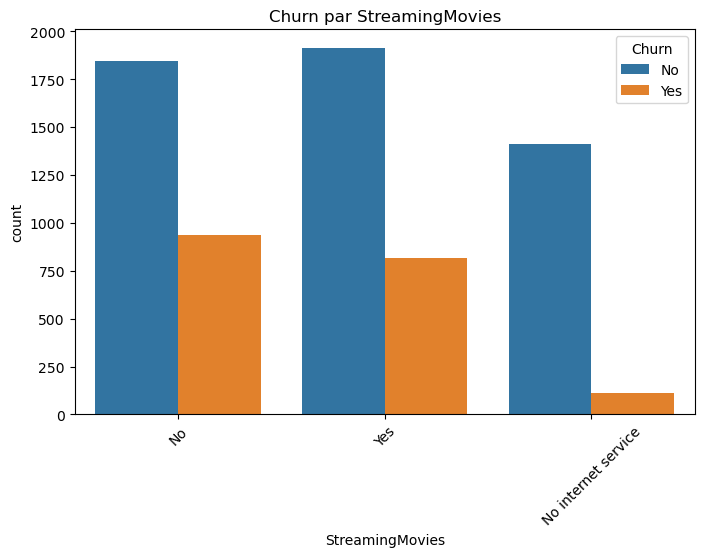

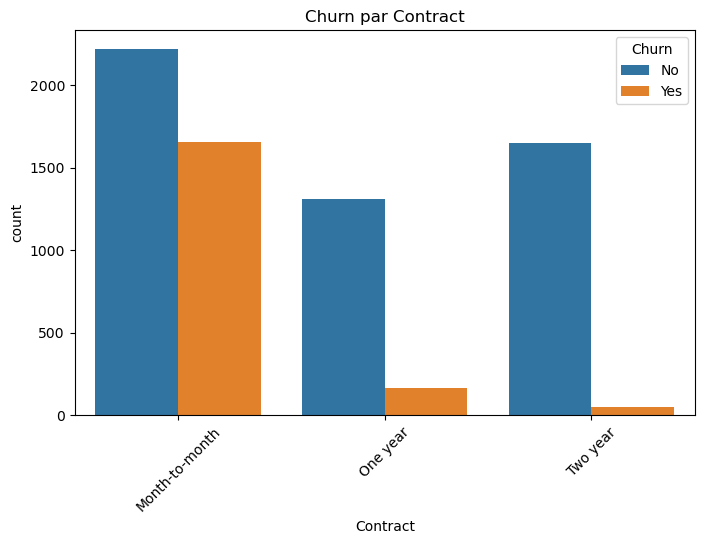

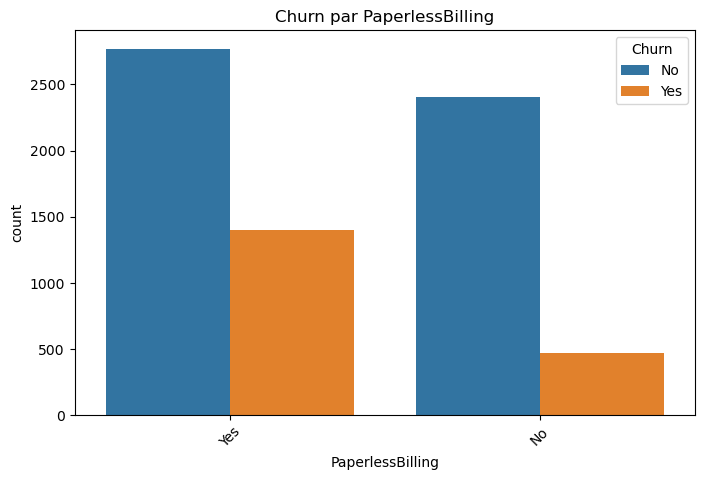

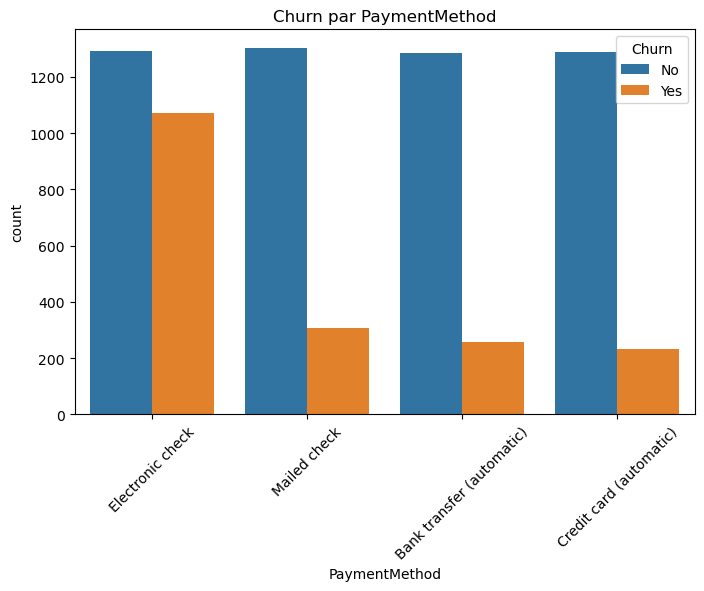

In [22]:
# Relation entre les variables catégorielles et le churn
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn par {feature}')
    plt.xticks(rotation=45)
    plt.show()


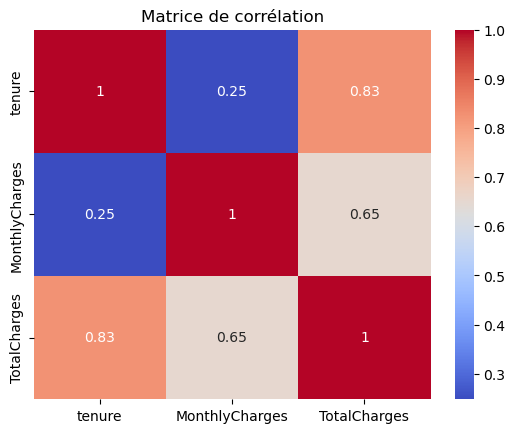

In [24]:
# Matrice de corrélation pour les charges et durée des abonnements
correlation = df[numerical_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

## Transform ##

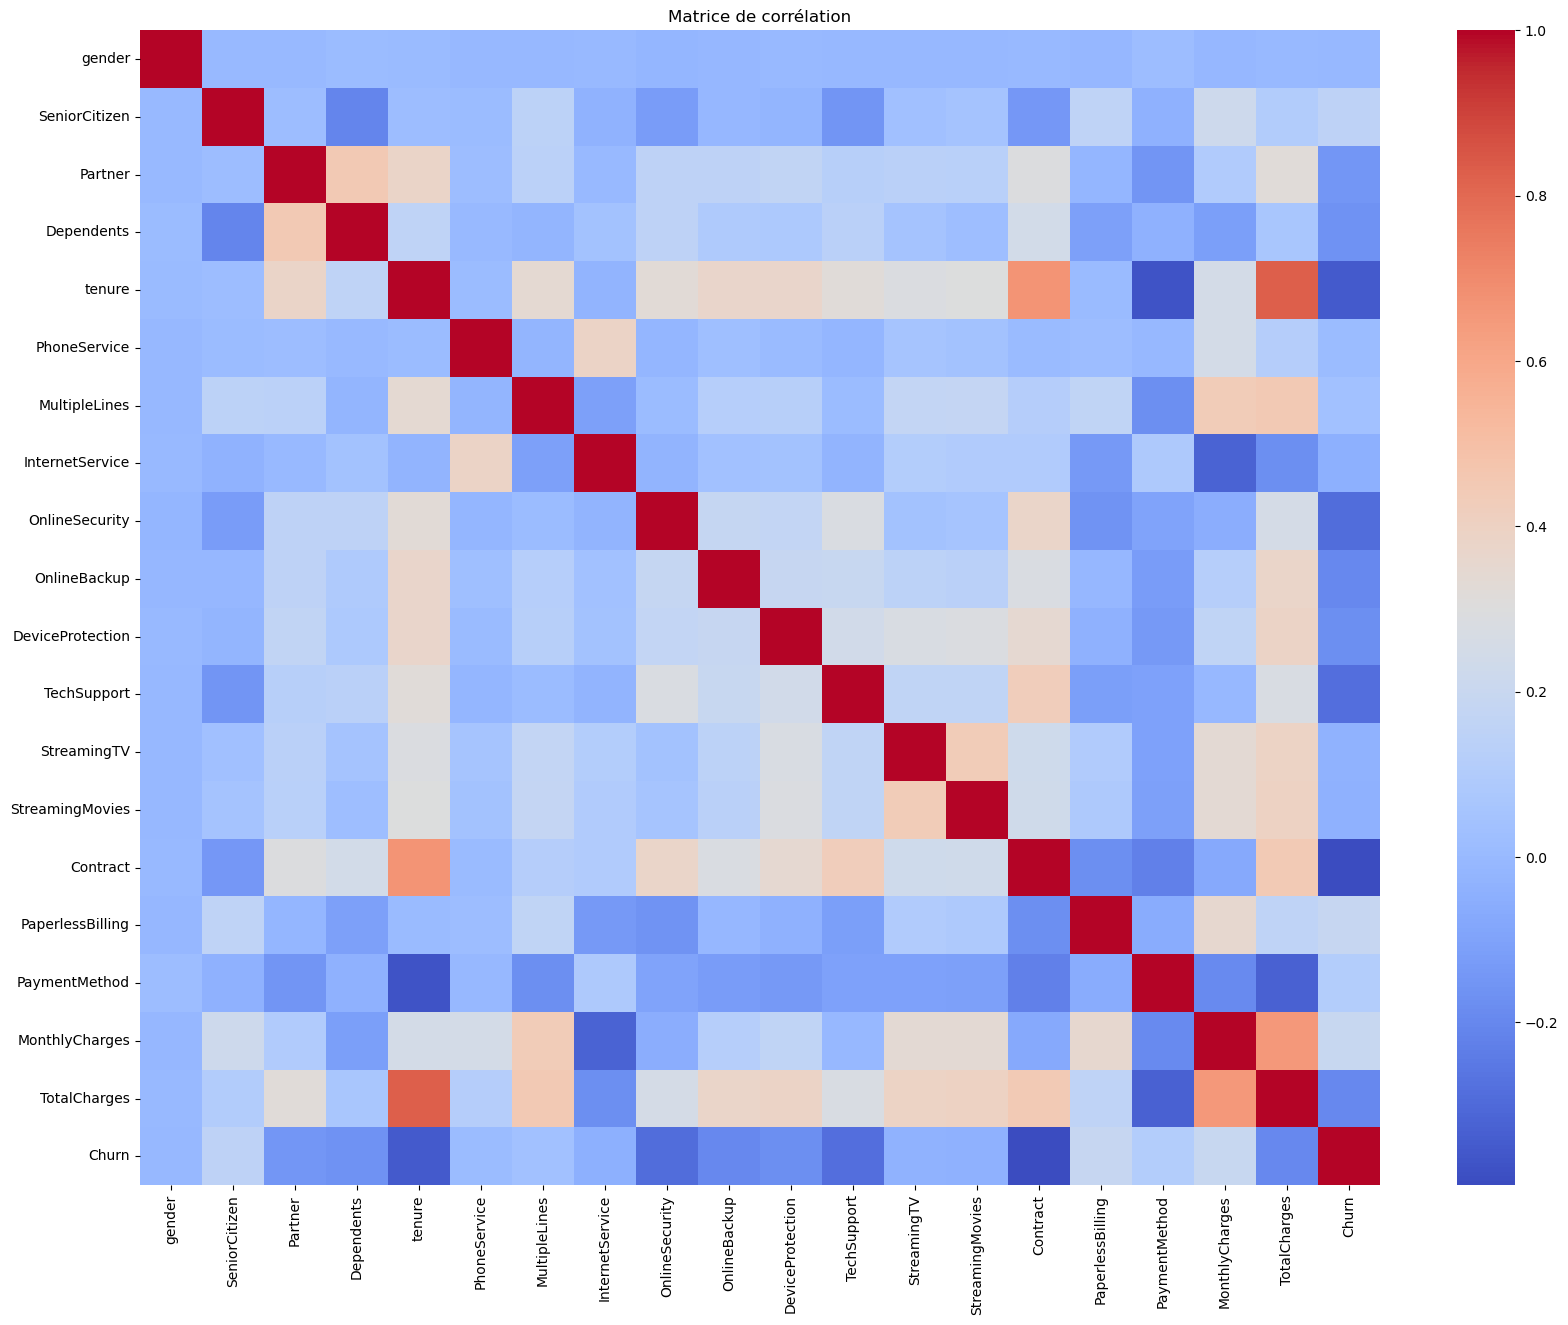

In [27]:
# Nettoyage valeurs manquantes dans colonnes importantes
important_columns = ['Contract', 'tenure', 'MonthlyCharges', 'PhoneService', 'InternetService']
df.dropna(subset=important_columns, inplace=True)

# convertit 'TotalCharges' en numérique + gère les valeurs manquantes
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encodage des variables catégorielles en valeurs numériques
label_encoders = {} 
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Dummies / one-hot encoding pour  variables catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# normalisation variables numériques, assure que toutes les variables numériques sont à la même échelle
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Séparation des données en données d'entrainement et de test
X = df.drop(columns=['Churn']) 
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Matrice de corrélation var catégorielles
correlation_matrix = df.corr() # Calcul 
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Matrice de corrélation')
plt.show()

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Load si nécessaire ##

## ML ##


Random Forest Model Performance:
Accuracy: 0.7963094393186657
ROC AUC Score: 0.8370006831803078
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



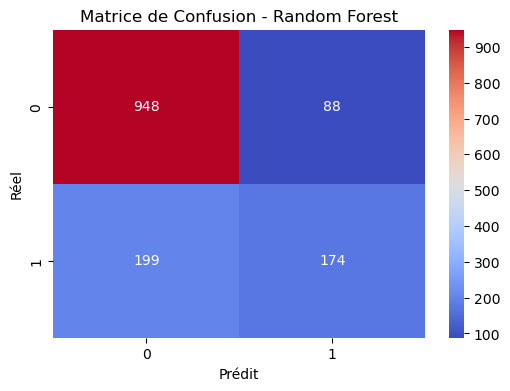


Gradient Boosting Model Performance:
Accuracy: 0.8055358410220014
ROC AUC Score: 0.8580045959402528
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



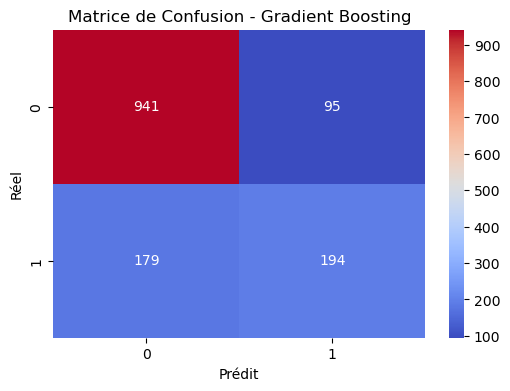


SVM Model Performance:
Accuracy: 0.8069552874378992
ROC AUC Score: 0.813167006531618
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



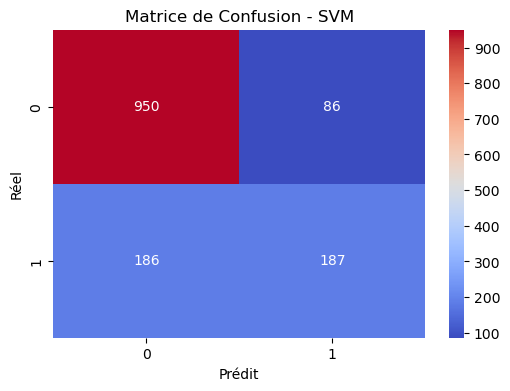


KNN Model Performance:
Accuracy: 0.7579843860894251
ROC AUC Score: 0.7789963460204747
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.55      0.50      0.52       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.75      1409



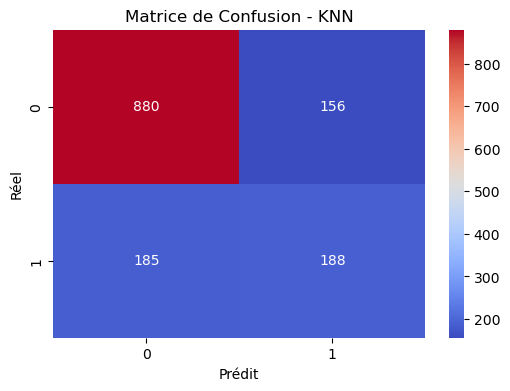


Régression logistique Model Performance:
Accuracy: 0.815471965933286
ROC AUC Score: 0.861354508472471
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



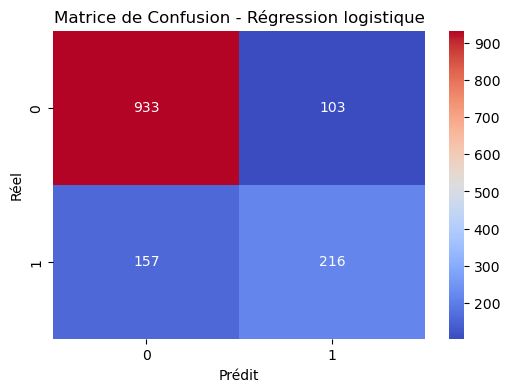

In [31]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Régression logistique": LogisticRegression()
}

# Entraînement + évaluation des modèles
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Matrice de confusion
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Matrice de Confusion - {name}')
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.show()




Résultats de la Cross-Validation :
Random Forest: 0.7894
Gradient Boosting: 0.8055
SVM: 0.7967
KNN: 0.7669
Régression logistique: 0.8021


/var/folders/9r/mg4gblmx0ml2wjrblqpzzchw0000gn/T/ipykernel_43914/3188212362.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="coolwarm")


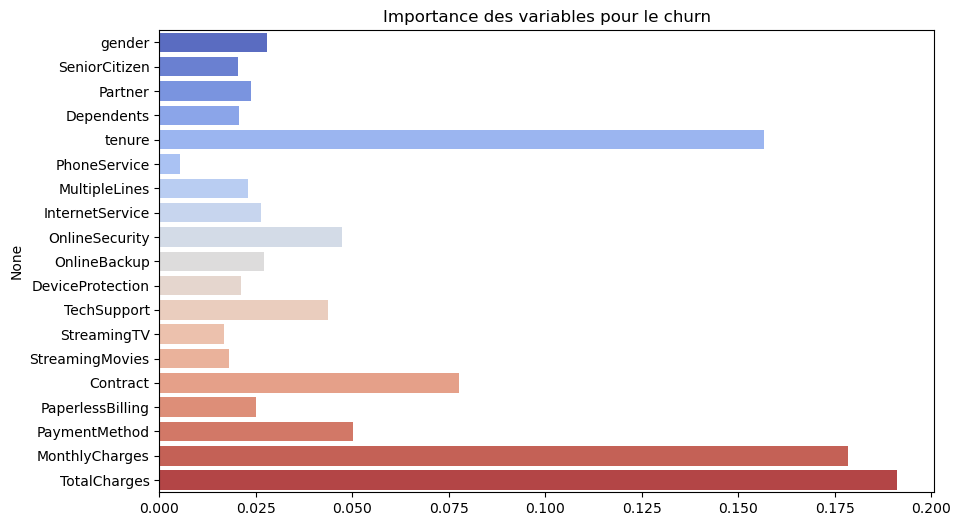


Top 10 clients les plus à risque de churn :
      Client_Index  Churn_Probability    tenure  Contract  MonthlyCharges  \
6714          6714               0.46 -0.788800         0        1.196105   
4428          4428               0.42 -0.544478         0        1.280857   
171            171               0.42 -1.236724         0        1.317416   
2208          2208               0.42 -1.277445         0        1.197767   
630            630               0.42  0.432811         0        1.528465   
6838          6838               0.42 -0.788800         0        1.137942   
6821          6821               0.42 -0.585198         0        1.166193   
5581          5581               0.41  1.450820         2        1.608231   
6166          6166               0.40 -0.055834         0        1.310769   
898            898               0.40 -0.829521         0        1.134619   

      TotalCharges  
6714     -0.427647  
4428     -0.118854  
171      -0.900229  
2208     -0.962919  
63

/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [33]:
# Cross-validation pour chaque modèle
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Cross-validation 5-fold
    cv_results[name] = scores.mean()  # Moyenne des scores

# résultats  cross-validation
print("\nRésultats de la Cross-Validation :")
for model, score in cv_results.items():
    print(f"{model}: {score:.4f}")

#### Facteurs de résiliation
importances = models["Random Forest"].feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette="coolwarm")
plt.title("Importance des variables pour le churn")
plt.show()

#### Segmentation clients à risque (10 plus à risque de churn)
df['Churn_Probability'] = models["Random Forest"].predict_proba(X)[:, 1]
df['Client_Index'] = df.index  # Utiliser l'index comme identifiant client

top_churners = df[['Client_Index', 'Churn_Probability', 'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']]\
                .sort_values(by='Churn_Probability', ascending=False)\
                .head(10)

print("\nTop 10 clients les plus à risque de churn :")
print(top_churners)

## Clustering

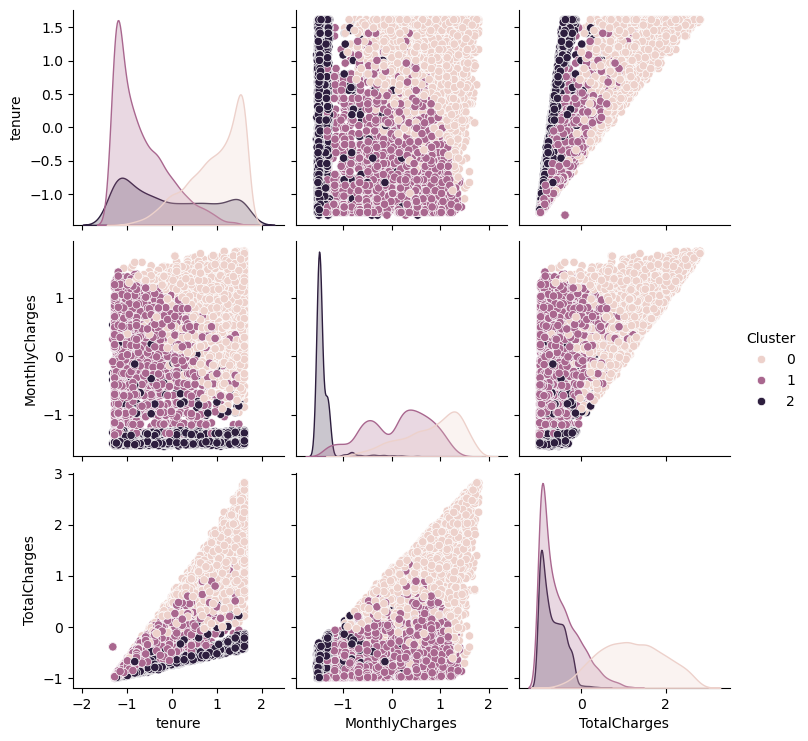

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

sns.pairplot(df, hue='Cluster', vars=['tenure', 'MonthlyCharges', 'TotalCharges'])
plt.show()


## Contenairisation etc 